In [4]:
import os
from os import path
import json

import numpy as np
import matplotlib.pyplot as plt
from wordsegment import load, segment

In [5]:
load()

In [11]:
DATASET_DIR = "../../fakenewsnet_dataset"
DATASET_DIR = path.abspath( DATASET_DIR )

NEWS_DIR = f"{DATASET_DIR}/politifact/fake"

In [13]:
def tree_size(root_node):

    node_count = 1 # itself

    children = [] + root_node["quoted_by"] + root_node["replied_by"] + root_node["retweeted_by"]
    for child in children:
        node_count += tree_size(child)

    return node_count

In [8]:
# return total BOW and word count
def tree_words(news_dir_path, root_node):
    
    with open(f"{news_dir_path}/tweets/{root_node['id']}.json", "r") as tweet_file:
        tweet_text = json.loads(tweet_file.read())['text']
        tweet_text_segmented = segment(tweet_text)
        word_count = len(tweet_text_segmented)
        bow = set(tweet_text_segmented)
        
        children = [] + root_node["quoted_by"] + root_node["replied_by"]
        for child in children:
            child_bow, child_word_count = tree_words(news_dir_path, child)
            bow.update(child_bow)
            word_count += child_word_count
            
        return (bow, word_count)

In [25]:
news_count = 0
sizes = []
news_word_counts = []
news_bow_sizes = []
cascade_word_counts = []
cascade_bow_sizes = []
cascadenews_word_counts = []
cascadenews_bow_sizes = []
for item in os.listdir(NEWS_DIR):
    news_dir_path = f"{NEWS_DIR}/{item}"
    
    if path.isdir(news_dir_path):

        if not path.exists(f"{news_dir_path}/news content.json"):
            continue

        if not path.exists(f"{news_dir_path}/cascade.json"):
            continue

        news_count += 1
        print(f"{news_count}: {item}")
#         if news_count > 5:
#             break

        with open(f"{news_dir_path}/news content.json", "r") as news_file:
            news = json.loads(news_file.read())["text"]
            news_segmented = segment(news)
            news_word_count = len(news_segmented)
            news_bow = set(news_segmented)
            news_word_counts.append(news_word_count)
            news_bow_sizes.append(len(news_bow))
            
            with open(f"{news_dir_path}/cascade.json", "r") as cascade_file:
                cascades = json.loads(cascade_file.read())

                for cas in cascades:
                    cascade_size = tree_size(cas)
                    sizes.append(cascade_size)

                    cascade_bow, cascade_wc = tree_words(news_dir_path, cas)
                    cascade_word_counts.append(cascade_wc)
                    cascade_bow_sizes.append(len(cascade_bow))

                    cascade_bow.update(news_bow)
                    cascadenews_wc = news_word_count + cascade_wc
                    cascadenews_word_counts.append(cascadenews_wc)
                    cascadenews_bow_sizes.append(len(cascade_bow))

1: politifact13038
2: politifact13467
3: politifact13468
4: politifact13475
5: politifact13496
6: politifact13501
7: politifact13515
8: politifact13557
9: politifact13559
10: politifact13560
11: politifact13561
12: politifact13565
13: politifact13576
14: politifact13577
15: politifact13584
16: politifact13591
17: politifact13593
18: politifact13600
19: politifact13601
20: politifact13608
21: politifact13617
22: politifact13663
23: politifact13687
24: politifact13698
25: politifact13703
26: politifact13711
27: politifact13720
28: politifact13731
29: politifact13744
30: politifact13747
31: politifact13751
32: politifact13765
33: politifact13766
34: politifact13773
35: politifact13775
36: politifact13784
37: politifact13794
38: politifact13806
39: politifact13807
40: politifact13815
41: politifact13816
42: politifact13823
43: politifact13827
44: politifact13836
45: politifact13853
46: politifact13854
47: politifact13893
48: politifact13897
49: politifact13913
50: politifact13921
51: polit

In [26]:
sizes = np.array(sizes)
news_word_counts = np.array(news_word_counts)
news_bow_sizes = np.array(news_bow_sizes)
cascade_word_counts = np.array(cascade_word_counts)
cascade_bow_sizes = np.array(cascade_bow_sizes)
cascadenews_word_counts = np.array(cascadenews_word_counts)
cascadenews_bow_sizes = np.array(cascadenews_bow_sizes)

In [38]:
cascade_avg_word_counts = cascade_word_counts / sizes
cascade_avg_bow_sizes = cascade_bow_sizes / sizes

In [27]:
print(f"news word count: min={news_word_counts.min()}, max={news_word_counts.max()}, \
    mean={news_word_counts.mean()}, Q1 = {np.percentile(news_word_counts, 25)}, \
        median={np.median(news_word_counts)}, Q3 = {np.percentile(news_word_counts, 75)}")

print(f"news BOW size: min={news_bow_sizes.min()}, max={news_bow_sizes.max()}, \
    mean={news_bow_sizes.mean()}, Q1 = {np.percentile(news_bow_sizes, 25)}, \
        median={np.median(news_bow_sizes)}, Q3 = {np.percentile(news_bow_sizes, 75)}")

print(f"cascade word count: min={cascade_word_counts.min()}, max={cascade_word_counts.max()}, \
    mean={cascade_word_counts.mean()}, Q1 = {np.percentile(cascade_word_counts, 25)}, \
        median={np.median(cascade_word_counts)}, Q3 = {np.percentile(cascade_word_counts, 75)}")

print(f"cascade BOW size: min={cascade_bow_sizes.min()}, max={cascade_bow_sizes.max()}, \
    mean={cascade_bow_sizes.mean()}, Q1 = {np.percentile(cascade_bow_sizes, 25)}, \
        median={np.median(cascade_bow_sizes)}, Q3 = {np.percentile(cascade_bow_sizes, 75)}")

print(f"cascadenews_word_counts: min={cascadenews_word_counts.min()}, max={cascadenews_word_counts.max()}, \
    mean={cascadenews_word_counts.mean()}, Q1 = {np.percentile(cascadenews_word_counts, 25)}, \
        median={np.median(cascadenews_word_counts)}, Q3 = {np.percentile(cascadenews_word_counts, 75)}")

print(f"cascadenews_bow_sizes: min={cascadenews_bow_sizes.min()}, max={cascadenews_bow_sizes.max()}, \
    mean={cascadenews_bow_sizes.mean()}, Q1 = {np.percentile(cascadenews_bow_sizes, 25)}, \
        median={np.median(cascadenews_bow_sizes)}, Q3 = {np.percentile(cascadenews_bow_sizes, 75)}")

news word count: min=0, max=5569,     mean=368.14159292035396, Q1 = 98.5,         median=266.0, Q3 = 463.5
news BOW size: min=0, max=1453,     mean=185.42772861356931, Q1 = 71.0,         median=158.0, Q3 = 247.0
cascade word count: min=0, max=594,     mean=14.395335709290666, Q1 = 11.0,         median=15.0, Q3 = 18.0
cascade BOW size: min=0, max=198,     mean=13.821769498437092, Q1 = 11.0,         median=14.0, Q3 = 17.0
cascadenews_word_counts: min=1, max=5587,     mean=324.40538718836626, Q1 = 54.0,         median=192.0, Q3 = 429.0
cascadenews_bow_sizes: min=1, max=1459,     mean=164.78737709476025, Q1 = 40.0,         median=102.0, Q3 = 227.0


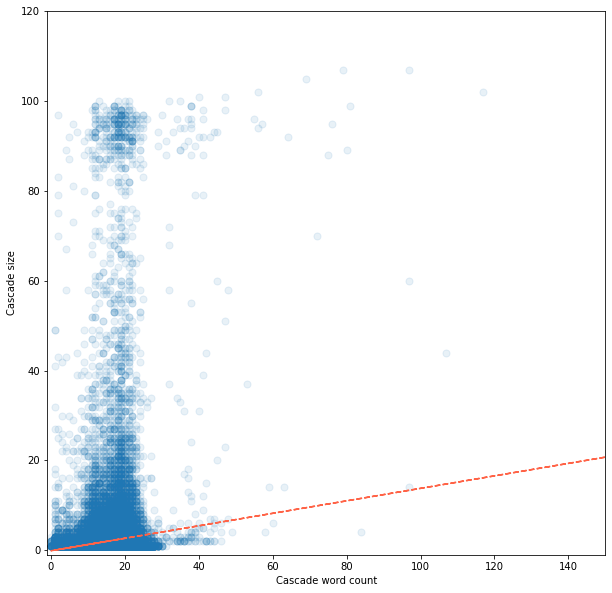

In [32]:
plt.figure( figsize=(10,10) )

# scatter plot
plt.scatter(cascade_word_counts, sizes, alpha = 0.1, s = 50)

# linear regression
a, b = np.polyfit(cascade_word_counts, sizes, 1)
plt.plot(cascade_word_counts, a*cascade_word_counts + b, color = "tomato", linewidth = 1.5, linestyle = "--")

plt.xlabel("Cascade word count"), plt.ylabel("Cascade size")
plt.xlim(-1, 150), plt.ylim(-1, 120)
plt.show()

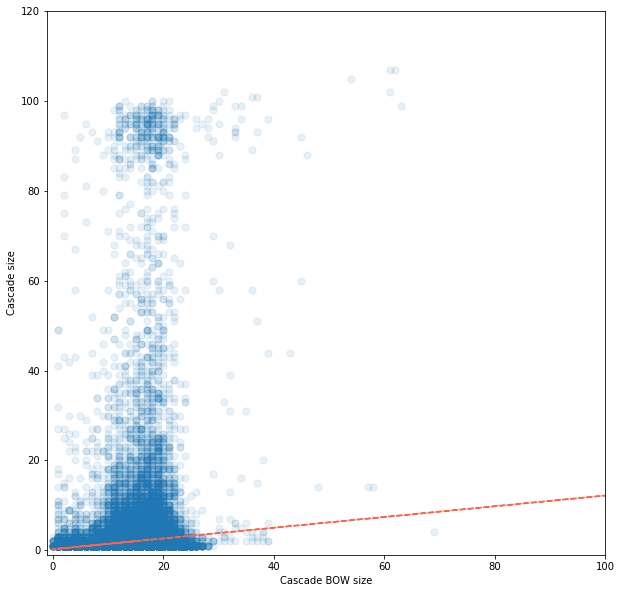

In [33]:
plt.figure( figsize=(10,10) )

# scatter plot
plt.scatter(cascade_bow_sizes, sizes, alpha = 0.1, s = 50)

# linear regression
a, b = np.polyfit(cascade_bow_sizes, sizes, 1)
plt.plot(cascade_bow_sizes, a*cascade_bow_sizes + b, color = "tomato", linewidth = 1.5, linestyle = "--")

plt.xlabel("Cascade BOW size"), plt.ylabel("Cascade size")
plt.xlim(-1, 100), plt.ylim(-1, 120)
plt.show()

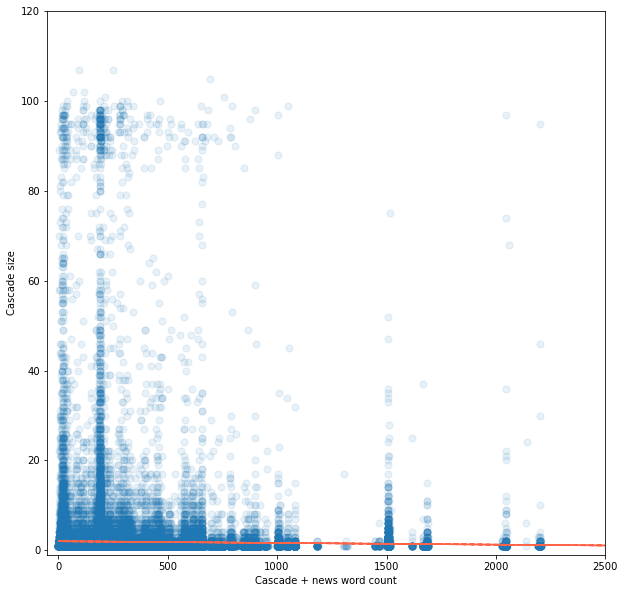

In [36]:
plt.figure( figsize=(10,10) )

# scatter plot
plt.scatter(cascadenews_word_counts, sizes, alpha = 0.1, s = 50)

# linear regression
a, b = np.polyfit(cascadenews_word_counts, sizes, 1)
plt.plot(cascadenews_word_counts, a*cascadenews_word_counts + b, color = "tomato", linewidth = 1.5, linestyle = "--")

plt.xlabel("Cascade + news word count"), plt.ylabel("Cascade size")
plt.xlim(-50, 2500), plt.ylim(-1, 120)
plt.show()

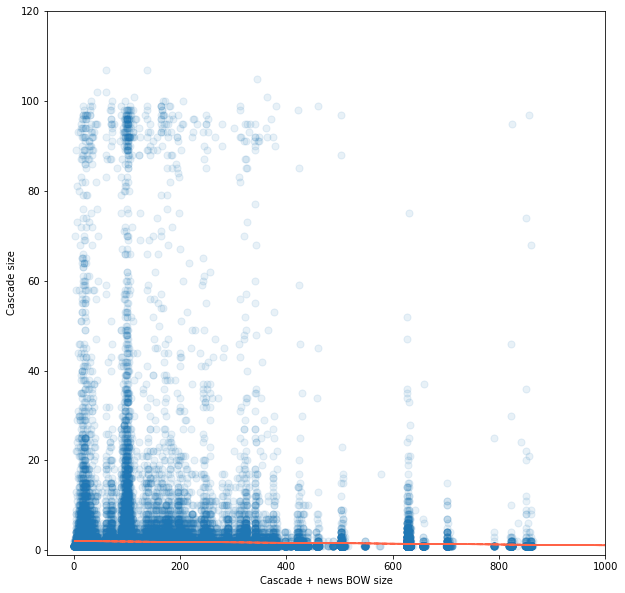

In [37]:
plt.figure( figsize=(10,10) )

# scatter plot
plt.scatter(cascadenews_bow_sizes, sizes, alpha = 0.1, s = 50)

# linear regression
a, b = np.polyfit(cascadenews_bow_sizes, sizes, 1)
plt.plot(cascadenews_bow_sizes, a*cascadenews_bow_sizes + b, color = "tomato", linewidth = 1.5, linestyle = "--")

plt.xlabel("Cascade + news BOW size"), plt.ylabel("Cascade size")
plt.xlim(-50, 1000), plt.ylim(-1, 120)
plt.show()

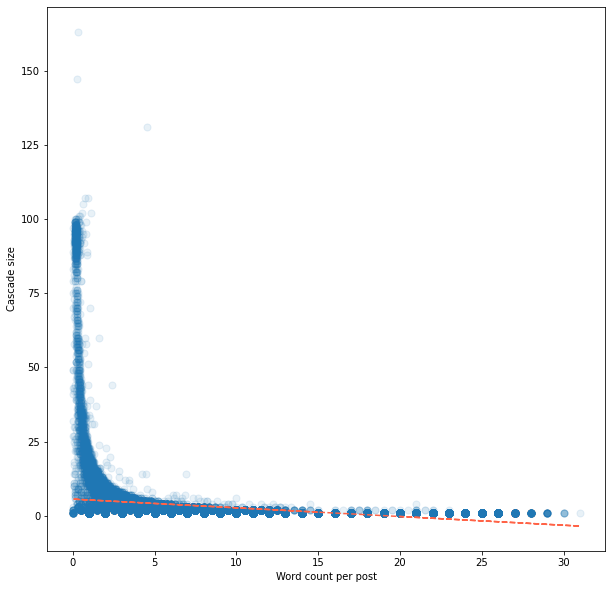

In [39]:
plt.figure( figsize=(10,10) )

# scatter plot
plt.scatter(cascade_avg_word_counts, sizes, alpha = 0.1, s = 50)

# linear regression
a, b = np.polyfit(cascade_avg_word_counts, sizes, 1)
plt.plot(cascade_avg_word_counts, a*cascade_avg_word_counts + b, color = "tomato", linewidth = 1.5, linestyle = "--")

plt.xlabel("Word count per post"), plt.ylabel("Cascade size")
#plt.xlim(-50, 1000), plt.ylim(-1, 120)
plt.show()

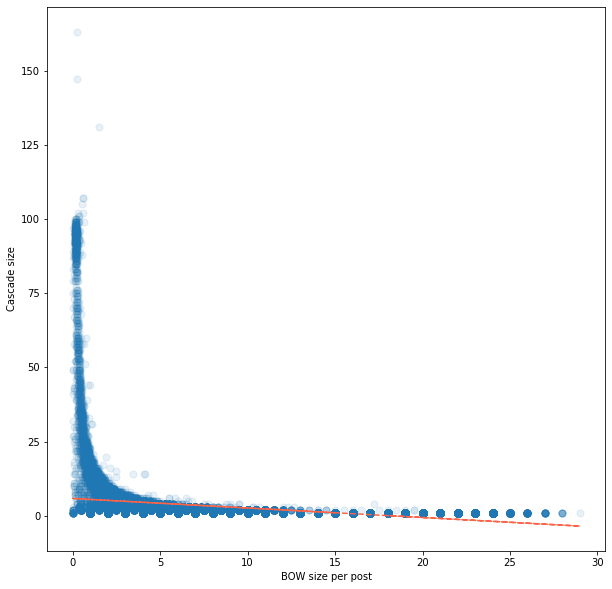

In [40]:
plt.figure( figsize=(10,10) )

# scatter plot
plt.scatter(cascade_avg_bow_sizes, sizes, alpha = 0.1, s = 50)

# linear regression
a, b = np.polyfit(cascade_avg_bow_sizes, sizes, 1)
plt.plot(cascade_avg_bow_sizes, a*cascade_avg_bow_sizes + b, color = "tomato", linewidth = 1.5, linestyle = "--")

plt.xlabel("BOW size per post"), plt.ylabel("Cascade size")
#plt.xlim(-50, 1000), plt.ylim(-1, 120)
plt.show()